In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwikrisda","key":"d41b47fc80e04d06ce6141027f6bc3ad"}'}

In [2]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d danyalhyder/the-new-chapterbook-recommendation-system

Dataset URL: https://www.kaggle.com/datasets/danyalhyder/the-new-chapterbook-recommendation-system
License(s): unknown
100% 12.7M/12.7M [00:01<00:00, 16.7MB/s]
100% 12.7M/12.7M [00:01<00:00, 9.53MB/s]


In [9]:
!unzip the-new-chapterbook-recommendation-system

Archive:  the-new-chapterbook-recommendation-system.zip
  inflating: book_tags.csv           
  inflating: newbooks.csv            
  inflating: ratings.csv             
  inflating: tags.csv                


# Data Understanding

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [11]:
newbooks = pd.read_csv('/content/newbooks.csv')
ratings = pd.read_csv('/content/ratings.csv')

newbooks

In [12]:
newbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   authors                    10000 non-null  object 
 3   original_publication_year  9979 non-null   float64
 4   original_title             9415 non-null   object 
 5   title                      10000 non-null  object 
 6   language_code              8916 non-null   object 
 7   average_rating             10000 non-null  float64
 8   ratings_count              10000 non-null  int64  
 9   medium_image_url           10000 non-null  object 
 10  small_image_url            10000 non-null  object 
 11  desc                       9998 non-null   object 
 12  genre                      9995 non-null   object 
 13  image_url                  10000 non-null  obje

In [13]:
newbooks.describe()

,book_id,goodreads_book_id,original_publication_year,average_rating,ratings_count
count,10000.00000,1.000000e+04,9979.000000,10000.000000,1.000000e+04
mean,5000.50000,5.264697e+06,1981.987674,4.002191,5.400124e+04
std,2886.89568,7.575462e+06,152.576665,0.254427,1.573700e+05
min,1.00000,1.000000e+00,-1750.000000,2.470000,2.716000e+03
25%,2500.75000,4.627575e+04,1990.000000,3.850000,1.356875e+04
50%,5000.50000,3.949655e+05,2004.000000,4.020000,2.115550e+04
75%,7500.25000,9.382225e+06,2011.000000,4.180000,4.105350e+04
max,10000.00000,3.328864e+07,2017.000000,4.820000,4.780653e+06


Ratings

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   user_id  1048575 non-null  int64
 1   book_id  1048575 non-null  int64
 2   rating   1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [15]:
ratings.describe()

,user_id,book_id,rating
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.501611e+03,1.742429e+03,3.806920e+00
std,4.552901e+03,2.338151e+03,1.005755e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.565000e+03,1.330000e+02,3.000000e+00
50%,7.358000e+03,6.500000e+02,4.000000e+00
75%,1.111000e+04,2.415000e+03,5.000000e+00
max,4.220800e+04,1.000000e+04,5.000000e+00


# Data Preprocessing

Menggabungkan data

In [16]:
# Baca data ke dalam DataFrame
newbooks = pd.read_csv('newbooks.csv')
ratings = pd.read_csv('ratings.csv')

# Gabungkan DataFrame berdasarkan kolom 'book_id'
all = pd.merge(newbooks, ratings, on='book_id')

# Tampilkan informasi tentang DataFrame yang telah digabungkan
print(all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   book_id                    1048575 non-null  int64  
 1   goodreads_book_id          1048575 non-null  int64  
 2   authors                    1048575 non-null  object 
 3   original_publication_year  1048303 non-null  float64
 4   original_title             1035112 non-null  object 
 5   title                      1048575 non-null  object 
 6   language_code              988491 non-null   object 
 7   average_rating             1048575 non-null  float64
 8   ratings_count              1048575 non-null  int64  
 9   medium_image_url           1048575 non-null  object 
 10  small_image_url            1048575 non-null  object 
 11  desc                       1048522 non-null  object 
 12  genre                      1048515 non-null  object 
 13  image_url   

Missing value

In [17]:
all.isnull().sum()

book_id                          0
goodreads_book_id                0
authors                          0
original_publication_year      272
original_title               13463
title                            0
language_code                60084
average_rating                   0
ratings_count                    0
medium_image_url                 0
small_image_url                  0
desc                            53
genre                           60
image_url                        0
user_id                          0
rating                           0
dtype: int64

# Data Preparation

Mengatasi missing value

In [18]:
all = all.dropna()
all

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,medium_image_url,small_image_url,desc,genre,image_url,user_id,rating
0,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...,4,5
1,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...,15,4
2,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...,29,5
3,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...,31,3
4,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5441,19747756,"Frank E. Peretti, Ted Dekker",2006.0,House,House,eng,3.60,17813,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,\r\nThe title characters in Me & Emma are very...,christian-fiction,https://s.gr-assets.com/assets/nophoto/book/11...,16255,2
1048571,8138,27864391,David Ebershoff,2000.0,The Danish Girl,The Danish Girl,eng,3.74,8292,https://images.gr-assets.com/books/1451790312m...,https://images.gr-assets.com/books/1451790312s...,\r\nWhen seven members of their family were ki...,historical-fiction,https://images.gr-assets.com/books/1451790312l...,4976,2
1048572,8138,27864391,David Ebershoff,2000.0,The Danish Girl,The Danish Girl,eng,3.74,8292,https://images.gr-assets.com/books/1451790312m...,https://images.gr-assets.com/books/1451790312s...,\r\nWhen seven members of their family were ki...,historical-fiction,https://images.gr-assets.com/books/1451790312l...,7606,5
1048573,8138,27864391,David Ebershoff,2000.0,The Danish Girl,The Danish Girl,eng,3.74,8292,https://images.gr-assets.com/books/1451790312m...,https://images.gr-assets.com/books/1451790312s...,\r\nWhen seven members of their family were ki...,historical-fiction,https://images.gr-assets.com/books/1451790312l...,4500,5


In [19]:
all.isnull().sum()

book_id                      0
goodreads_book_id            0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
medium_image_url             0
small_image_url              0
desc                         0
genre                        0
image_url                    0
user_id                      0
rating                       0
dtype: int64

Mengurutkan

In [20]:
all= all.sort_values('book_id', ascending=True)
all

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,medium_image_url,small_image_url,desc,genre,image_url,user_id,rating
963553,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,2354,4
963389,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,986,5
963388,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,8500,4
963387,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,789,5
963386,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,11375,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036340,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,14276,5
1036339,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,12462,4
1036325,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,13502,5
1036319,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,4668,1


In [21]:
len(all.book_id.unique())

6606

In [22]:
preparation = all
preparation.sort_values('book_id')

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,medium_image_url,small_image_url,desc,genre,image_url,user_id,rating
963553,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,2354,4
964924,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,9613,5
964923,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,12751,5
964922,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,10392,4
964921,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,11934,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036321,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,6397,3
1036332,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,2850,5
1036319,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,4668,1
1036320,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,\r\nSalman Rushdie's most ambitious and accomp...,non-fiction,https://images.gr-assets.com/books/1279214118l...,927,5


In [23]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('book_id')
preparation

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,medium_image_url,small_image_url,desc,genre,image_url,user_id,rating
963553,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,\r\nWINNING MEANS FAME AND FORTUNE.LOSING MEAN...,young-adult,https://images.gr-assets.com/books/1447303603l...,2354,4
9812,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,\r\nAlternate cover edition of ISBN 9780439554...,fantasy,https://images.gr-assets.com/books/1474154022l...,6449,5
605855,3,41865,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,\r\nAbout three things I was absolutely positi...,young-adult,https://images.gr-assets.com/books/1361039443l...,12248,4
109086,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,\r\nThe unforgettable novel of a childhood in ...,classics,https://images.gr-assets.com/books/1361975680l...,688,5
165120,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,\r\nAlternate Cover Edition ISBN: 0743273567 (...,classics,https://images.gr-assets.com/books/1490528560l...,14173,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418271,9995,15613,Herman Melville,1924.0,"Billy Budd, Sailor","Billy Budd, Sailor",eng,3.09,10866,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,\r\nSalman Rushdie's most ambitious and accomp...,classics,https://s.gr-assets.com/assets/nophoto/book/11...,16202,2
1021612,9996,7130616,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,17204,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,\r\nSalman Rushdie's most ambitious and accomp...,urban-fantasy,https://images.gr-assets.com/books/1307445460l...,14189,5
811629,9997,208324,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,\r\nSalman Rushdie's most ambitious and accomp...,biography,https://s.gr-assets.com/assets/nophoto/book/11...,14009,5
697894,9998,77431,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,9421,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,\r\nSalman Rushdie's most ambitious and accomp...,historical-fiction,https://images.gr-assets.com/books/1455373531l...,3056,4


In [24]:
# Mengonversi data series ‘book_id’ menjadi dalam bentuk list
book_id = preparation['book_id'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
title = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genre = preparation['genre'].tolist()

print(len(book_id))
print(len(title))
print(len(genre))

6606
6606
6606


In [25]:
# Membuat dictionary untuk data ‘book_id’, ‘title’, dan ‘genre’
mybook = pd.DataFrame({
    'book_id': book_id,
    'title': title,
    'genre': genre
})
mybook

,book_id,title,genre
0,1,"The Hunger Games (The Hunger Games, #1)",young-adult
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,fantasy
2,3,"Twilight (Twilight, #1)",young-adult
3,4,To Kill a Mockingbird,classics
4,5,The Great Gatsby,classics
...,...,...,...
6601,9995,"Billy Budd, Sailor",classics
6602,9996,"Bayou Moon (The Edge, #2)",urban-fantasy
6603,9997,"Means of Ascent (The Years of Lyndon Johnson, #2)",biography
6604,9998,The Mauritius Command,historical-fiction


# Modeling and Result

**Model Development dengan Content Based Filtering**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(mybook['genre'])

# Mapping array dari fitur index integer ke fitur nama
feature_names = tf.get_feature_names_out()
print(feature_names)

['1001' '2011' '39' 'adult' 'adventure' 'african' 'agatha' 'alex'
 'american' 'angels' 'animals' 'anne' 'arabic' 'art' 'audio' 'audiobook'
 'baldacci' 'before' 'bhagat' 'biography' 'black' 'blyton' 'bob' 'book'
 'bookclub' 'books' 'brad' 'brown' 'buddhism' 'business' 'buy' 'caldecott'
 'challenge' 'cherub' 'chetan' 'chick' 'child' 'childhood' 'children'
 'childrens' 'china' 'christian' 'christie' 'christine' 'christmas'
 'civil' 'clancy' 'clark' 'classic' 'classics' 'clive' 'club' 'clues'
 'clàssics' 'coelho' 'comedy' 'comics' 'connelly' 'contemporary'
 'cookbook' 'cookbooks' 'cornwell' 'crime' 'cross' 'cussler' 'cycling'
 'cómics' 'daniel' 'david' 'dean' 'debbie' 'default' 'demille' 'design'
 'development' 'devotional' 'diana' 'diaries' 'diary' 'die' 'discworld'
 'dork' 'dragons' 'drama' 'dystopia' 'dystopian' 'east' 'economics'
 'education' 'elin' 'enid' 'entrepreneurship' 'erotica' 'essays'
 'evanovich' 'fairy' 'fantasy' 'favourites' 'feehan' 'feminism' 'fi'
 'fiction' 'finance' 'fl

In [27]:
tfidf_matrix = tf.fit_transform(mybook['genre'])
tfidf_matrix.shape

(6606, 307)

In [28]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=feature_names,
    index=mybook['title']
).sample(22, axis=1).sample(10, axis=0)


,western,koontz,romance,christie,lee,wicca,vince,tami,india,nonfiction,...,urban,fairy,alex,audiobook,sci,self,picoult,anne,diary,pdf
title,,,,,,,,,,,,,,,,,,,,,
"Eye of the Storm (Sean Dillon, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The End of the Affair,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Commitments,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Sex Lives of Cannibals: Adrift in the Equatorial Pacific,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Darke (Septimus Heap, #6)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Twisted (Pretty Little Liars, #9)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Reliable Wife,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Without Remorse (Jack Ryan Universe, #1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Desert Spear (Demon Cycle, #2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.23274918],
       [0.        , 0.        , 0.        , ..., 0.        , 0.23274918,
        1.        ]])

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=mybook['title'], columns=mybook['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6606, 6606)


title,Rage,"To Sir Phillip, With Love (Bridgertons, #5)","Changeless (Parasol Protectorate, #2)","Vampire Kisses: The Beginning (Vampire Kisses, #1-3)",The Greatest Show on Earth: The Evidence for Evolution
title,,,,,
"Champions of the Force (Star Wars: The Jedi Academy Trilogy, #3)",0.0,0.0,0.0,0.0,0.0
"ttyl (Internet Girls, #1)",0.0,0.0,0.0,0.0,0.0
Hopscotch,0.0,0.0,0.0,0.0,0.0
A Long Way Down,0.0,0.0,0.0,0.0,0.0
Handle with Care,0.0,0.0,0.0,0.0,0.0
Tess of the D'Urbervilles,0.0,0.0,0.0,0.0,0.0
Independence Day,0.0,0.0,0.0,0.0,0.0
"Kushiel's Avatar (Phèdre's Trilogy, #3)",0.0,0.0,0.0,0.0,0.0
"Split Second (Sean King & Michelle Maxwell, #1)",0.0,0.0,0.0,0.0,0.0


Mendapatkan rekomendasi

In [32]:
def book_recommendations(title, similarity_data=cosine_sim_df, items=mybook[['title', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [33]:
mybook[mybook.title.eq('Vernon God Little')]

,book_id,title,genre
2894,3869,Vernon God Little,fiction


In [34]:
book_recommendations('Vernon God Little')

,title,genre
0,Infinite Jest,fiction
1,Back When We Were Grownups,fiction
2,True History of the Kelly Gang,fiction
3,The Day of the Locust,fiction
4,"The End (A Series of Unfortunate Events, #13)",fiction


**Model** Development dengan Collaborative Filtering

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt


In [36]:
# Membaca dataset
ratings = ratings
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
1048570,16290,119,2
1048571,7453,13,5
1048572,7453,58,5
1048573,7453,706,5


In [37]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_id = ratings['user_id'].unique().tolist()
print('list user_id: ', user_id)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('encoded angka ke userID: ', user_encoded_to_user)

list user_id:  [1, 2, 4, 6, 8, 9, 11, 15, 18, 22, 24, 25, 28, 32, 29, 34, 40, 31, 43, 49, 46, 50, 53, 55, 58, 61, 62, 65, 66, 54, 56, 69, 70, 63, 72, 73, 59, 74, 75, 76, 80, 38, 83, 85, 78, 45, 89, 93, 94, 100, 26, 103, 105, 108, 112, 113, 114, 115, 117, 86, 90, 116, 123, 124, 125, 126, 128, 129, 135, 122, 137, 136, 141, 142, 143, 149, 151, 156, 130, 158, 164, 36, 167, 169, 173, 174, 175, 177, 176, 180, 178, 183, 171, 184, 185, 187, 189, 168, 190, 106, 191, 194, 195, 196, 197, 199, 179, 10, 202, 203, 204, 205, 207, 206, 210, 212, 214, 219, 220, 223, 228, 229, 230, 232, 233, 42, 237, 239, 240, 245, 242, 247, 246, 248, 250, 253, 255, 256, 257, 258, 238, 77, 162, 263, 264, 265, 155, 269, 101, 274, 271, 276, 278, 21, 283, 285, 286, 279, 131, 287, 284, 289, 243, 296, 297, 215, 298, 301, 302, 311, 299, 300, 110, 317, 318, 303, 319, 159, 320, 325, 324, 322, 323, 330, 332, 338, 340, 312, 68, 304, 344, 345, 270, 347, 351, 352, 342, 356, 357, 361, 362, 363, 364, 360, 316, 337, 370, 154, 375, 378

In [38]:
# Mengubah book_id menjadi list tanpa nilai yang sama
book_id = ratings['book_id'].unique().tolist()
# Melakukan proses encoding book_id
# Melakukan proses encoding angka ke book_id
book_to_book_encoded = {x: i for i, x in enumerate(book_id)}
book_encoded_to_book = {i: x for i, x in enumerate(book_id)}


In [39]:
# Mapping user_id ke dataframe user
# Mapping book_id ke dataframe book
ratings['user'] = ratings['user_id'].map(user_to_user_encoded)
ratings['book'] = ratings['book_id'].map(book_to_book_encoded)

In [40]:

import numpy as np
# Mendapatkan jumlah user
num_users = len(user_encoded_to_user)
print(num_users)

# Mendapatkan jumlah BUKU
num_book = len(book_encoded_to_book)
print(num_book)

# Mengubah rating menjadi nilai float
ratings['rating'] = ratings['rating'].values.astype(np.float32)

# Nilai minimum rating
# Nilai maksimal rating
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Buku: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating))


13123
7774
Number of User: 13123, Number of Buku: 7774, Min Rating: 1.0, Max Rating: 5.0


Membagi Data untuk Training dan Validasi

In [41]:
# Mengacak dataset
ratings = ratings.sample(frac=1, random_state=42)
ratings

,user_id,book_id,rating,user,book
781974,11737,68,4.0,9953,185
937737,14834,1955,5.0,11814,2096
907828,8422,408,3.0,11428,148
784628,12840,1752,4.0,9982,232
662460,11233,184,5.0,8650,91
...,...,...,...,...,...
259178,5491,2650,3.0,4119,2520
365838,772,129,4.0,5518,487
131932,3617,8,4.0,2265,34
671155,11364,272,4.0,8752,412


In [42]:

# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = ratings[['user', 'book']].values

# Membuat variabel y untuk membuat rating dari hasil
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 70% data train dan 20% data validasi
train_indices = int(0.70 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 9953   185]
 [11814  2096]
 [11428   148]
 ...
 [ 2265    34]
 [ 8752   412]
 [ 1085   240]] [0.75 1.   0.5  ... 0.75 0.75 0.5 ]


training

In [43]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user

        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)# layer embedding user bias
    self.resto_embedding = layers.Embedding(# layer embeddings buku
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1)#layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])# memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0])# memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1])# memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1])# memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x)# activation sigmoid

# Evaluasi

In [44]:

model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [45]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
146801/146801 [==============================] - 2028s 14ms/step - loss: 0.5994 - root_mean_squared_error: 0.2414 - val_loss: 0.5843 - val_root_mean_squared_error: 0.2276
Epoch 2/10
146801/146801 [==============================] - 2063s 14ms/step - loss: 0.5795 - root_mean_squared_error: 0.2239 - val_loss: 0.5809 - val_root_mean_squared_error: 0.2250
Epoch 3/10
146801/146801 [==============================] - 1959s 13ms/step - loss: 0.5780 - root_mean_squared_error: 0.2224 - val_loss: 0.5819 - val_root_mean_squared_error: 0.2250
Epoch 4/10
146801/146801 [==============================] - 2049s 14ms/step - loss: 0.5787 - root_mean_squared_error: 0.2222 - val_loss: 0.5834 - val_root_mean_squared_error: 0.2253
Epoch 5/10
146801/146801 [==============================] - 1944s 13ms/step - loss: 0.5798 - root_mean_squared_error: 0.2224 - val_loss: 0.5849 - val_root_mean_squared_error: 0.2256
Epoch 6/10
146801/146801 [==============================] - 1937s 13ms/step - loss: 0.5809

In [46]:
import matplotlib.pyplot as plt

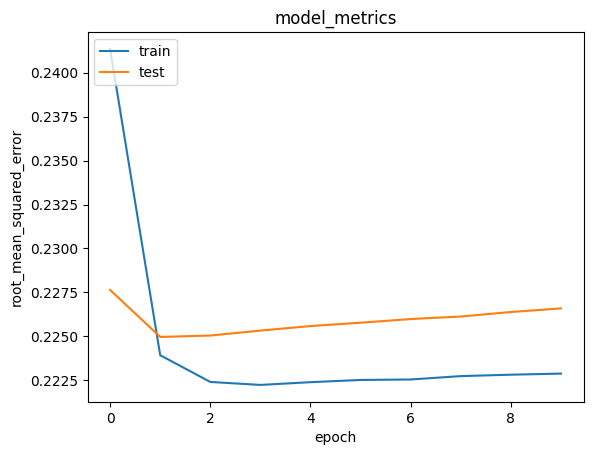

In [47]:

# Visualisasi Metrik
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [48]:
newbooks

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,medium_image_url,small_image_url,desc,genre,image_url
0,27,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,\r\nWhen Harry Potter and the Half-Blood Princ...,fantasy,https://images.gr-assets.com/books/1361039191l...
1,21,2,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix (Har...,eng,4.46,1735368,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...,\r\nThere is a door at the end of a silent cor...,fantasy,https://images.gr-assets.com/books/1387141547l...
2,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,\r\nAlternate cover edition of ISBN 9780439554...,fantasy,https://images.gr-assets.com/books/1474154022l...
3,18,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban (Harr...,eng,4.53,1832823,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...,\r\nHarry Potter's third year at Hogwarts is f...,fantasy,https://images.gr-assets.com/books/1499277281l...
4,24,6,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire (Harry Pot...,eng,4.53,1753043,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...,\r\nHarry Potter is midway through his trainin...,fantasy,https://images.gr-assets.com/books/1361482611l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7523,31538647,J.K. Rowling,2016.0,Hogwarts: An Incomplete and Unreliable Guide,Hogwarts: An Incomplete and Unreliable Guide (...,eng,4.21,14977,https://images.gr-assets.com/books/1502156557m...,https://images.gr-assets.com/books/1502156557s...,\r\nA major new novel from one of science fict...,fantasy,https://images.gr-assets.com/books/1502156557l...
9996,4594,31845516,Glennon Doyle Melton,2016.0,Love Warrior,Love Warrior,en-US,4.10,20094,https://images.gr-assets.com/books/1473164102m...,https://images.gr-assets.com/books/1473164102s...,"\r\nHeadstrong and beautiful, the young housem...",memoir,https://images.gr-assets.com/books/1473164102l...
9997,9569,32075671,Angie Thomas,2017.0,The Hate U Give,The Hate U Give,eng,4.62,32610,https://images.gr-assets.com/books/1476284759m...,https://images.gr-assets.com/books/1476284759s...,\r\nThe life of Spokane Indian Thomas Builds-t...,young-adult,https://images.gr-assets.com/books/1476284759l...
9998,9580,32848471,Vi Keeland,2017.0,NaN,Egomaniac,NaN,4.34,11310,https://images.gr-assets.com/books/1479387807m...,https://images.gr-assets.com/books/1479387807s...,\r\nThe life of Spokane Indian Thomas Builds-t...,funny,https://images.gr-assets.com/books/1479387807l...


In [49]:
# Mengambil sample user
user_id = ratings.user_id.sample(1).iloc[0]
books_have_been_read_by_user = ratings[ratings.user_id == user_id]

books_have_not_been_read_by_user = newbooks[newbooks['book_id'].isin(books_have_been_read_by_user.book_id.values)]['book_id']
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)

books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

In [50]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]

top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .rating.values
)

books_row = newbooks[newbooks['book_id'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.title, ':', row.authors)

print('----' * 8)
print('Top 5 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)

recommended_books = newbooks[newbooks['book_id'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.title, ':', row.authors)

5/5 [==============================] - 0s 3ms/step
The Great Gatsby : F. Scott Fitzgerald
--------------------------------
Top 5 Book Recommendation for user: 5603
--------------------------------
Harry Potter and the Half-Blood Prince (Harry Potter, #6) : J.K. Rowling, Mary GrandPré
Harry Potter and the Goblet of Fire (Harry Potter, #4) : J.K. Rowling, Mary GrandPré
Ptolemy's Gate (Bartimaeus, #3) : Jonathan Stroud
Harry Potter and the Deathly Hallows (Harry Potter, #7) : J.K. Rowling, Mary GrandPré
The Naming (The Books of Pellinor, #1) : Alison Croggon


# Evaluation